<a href="https://colab.research.google.com/github/neworderby/Python_EDA_ML/blob/main/Simpsons_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Информация о датасете (kaggle.com)

Episode info and viewership numbers for all aired episodes of The Simpsons. Info includes director, writers, viewership (millions), IMDB rating, episode title, and synopsis. Also includes a lookup table of all character names.

# Загрузка данных и установка необходимых библиотек

##Загрузка с google drive:

https://drive.google.com/file/d/1Zc_eZYTRDgkx6pqHDJsskI_qb980TfAk/view?usp=share_link

In [ ]:
! gdown --id 1Zc_eZYTRDgkx6pqHDJsskI_qb980TfAk

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Zc_eZYTRDgkx6pqHDJsskI_qb980TfAk
To: /content/simpsons_data.zip
100% 163k/163k [00:00<00:00, 73.2MB/s]


##Распаковка zip:

In [ ]:
! unzip /content/simpsons_data.zip

Archive:  /content/simpsons_data.zip
replace simpsons_characters.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace simpsons_episodes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace simpsons_rt_scores.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


##Установка библиотек:

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

##Чтение данных:

###Основной датасет:

In [ ]:
df = pd.read_csv('/content/simpsons_episodes.csv',parse_dates =['original_air_date'])
df.head()

,Unnamed: 0,title,description,original_air_date,production_code,directed_by,written_by,season,number_in_season,number_in_series,us_viewers_in_millions,imdb_rating
0,0,Simpsons Roasting on an Open Fire,Homer is forced to become a department store S...,1989-12-17,7G08,David Silverman,Mimi Pond,1,1,1,26.7,8.1
1,1,Bart the Genius,Bart ends up at a school for gifted children a...,1990-01-14,7G02,David Silverman,Jon Vitti,1,2,2,24.5,7.7
2,2,Homer's Odyssey,"After losing his job, Homer contemplates endin...",1990-01-21,7G03,Wes Archer,Jay Kogen & Wallace Wolodarsky,1,3,3,27.5,7.3
3,3,There's No Disgrace Like Home,After being embarrassed by the rest of the fam...,1990-01-28,7G04,Gregg Vanzo & Kent Butterworth,Al Jean & Mike Reiss,1,4,4,20.2,7.7
4,4,Bart the General,After being beaten up by Nelson Muntz one too ...,1990-02-04,7G05,David Silverman,John Swartzwelder,1,5,5,27.1,7.9


In [ ]:
df.columns

Index(['Unnamed: 0', 'title', 'description', 'original_air_date',
       'production_code', 'directed_by', 'written_by', 'season',
       'number_in_season', 'number_in_series', 'us_viewers_in_millions',
       'imdb_rating'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Unnamed: 0              740 non-null    int64         
 1   title                   740 non-null    object        
 2   description             737 non-null    object        
 3   original_air_date       739 non-null    datetime64[ns]
 4   production_code         740 non-null    object        
 5   directed_by             740 non-null    object        
 6   written_by              740 non-null    object        
 7   season                  740 non-null    int64         
 8   number_in_season        740 non-null    int64         
 9   number_in_series        740 non-null    int64         
 10  us_viewers_in_millions  737 non-null    object        
 11  imdb_rating             736 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object

In [ ]:
df['us_viewers_in_millions'] = df['us_viewers_in_millions'].replace('TBD',np.nan)

In [ ]:
df['us_viewers_in_millions'] = df.us_viewers_in_millions.astype('float64')

In [ ]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
df.head()

,title,description,original_air_date,production_code,directed_by,written_by,season,number_in_season,number_in_series,us_viewers_in_millions,imdb_rating
0,Simpsons Roasting on an Open Fire,Homer is forced to become a department store S...,1989-12-17,7G08,David Silverman,Mimi Pond,1,1,1,26.7,8.1
1,Bart the Genius,Bart ends up at a school for gifted children a...,1990-01-14,7G02,David Silverman,Jon Vitti,1,2,2,24.5,7.7
2,Homer's Odyssey,"After losing his job, Homer contemplates endin...",1990-01-21,7G03,Wes Archer,Jay Kogen & Wallace Wolodarsky,1,3,3,27.5,7.3
3,There's No Disgrace Like Home,After being embarrassed by the rest of the fam...,1990-01-28,7G04,Gregg Vanzo & Kent Butterworth,Al Jean & Mike Reiss,1,4,4,20.2,7.7
4,Bart the General,After being beaten up by Nelson Muntz one too ...,1990-02-04,7G05,David Silverman,John Swartzwelder,1,5,5,27.1,7.9


In [ ]:
df.describe()

,season,number_in_season,number_in_series,us_viewers_in_millions,imdb_rating
count,740.000000,740.000000,740.000000,733.000000,736.000000
mean,17.287838,15.822973,3074.866216,10.352333,7.168071
std,9.645804,83.124813,42521.869804,6.907216,0.815296
min,1.000000,1.000000,1.000000,0.850000,4.000000
25%,9.000000,6.000000,185.750000,4.930000,6.600000
50%,17.000000,11.000000,370.500000,8.720000,7.000000
75%,26.000000,17.000000,555.250000,14.800000,7.700000
max,34.000000,1920.000000,712713.000000,33.600000,9.300000


###Дополнительные датасеты:

In [ ]:
characters = pd.read_csv('/content/simpsons_characters.csv')
characters

,id,name,normalized_name,gender
0,7,Children,children,NaN
1,12,Mechanical Santa,mechanical santa,NaN
2,13,Tattoo Man,tattoo man,NaN
3,16,DOCTOR ZITSOFSKY,doctor zitsofsky,NaN
4,20,Students,students,NaN
...,...,...,...,...
6717,5222,Ron Rabinowitz,ron rabinowitz,m
6718,5728,Martha Stewart,martha stewart,f
6719,1770,Officer Goodman,officer goodman,m
6720,1634,Evan Conover,evan conover,m


In [ ]:
characters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6722 entries, 0 to 6721
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               6722 non-null   int64 
 1   name             6722 non-null   object
 2   normalized_name  6722 non-null   object
 3   gender           323 non-null    object
dtypes: int64(1), object(3)
memory usage: 210.2+ KB


In [ ]:
scores = pd.read_csv('/content/simpsons_rt_scores.csv')
scores.head()

,season,rt_critic_score,rt_user_score,rt_critic_count,rt_user_count
0,1,100%,87%,18,359
1,2,100%,93%,8,249
2,3,100%,94%,5,237
3,4,100%,94%,11,228
4,5,100%,95%,5,227


In [ ]:
scores["rt_critic_score"] = scores["rt_critic_score"].str.replace("%","")
scores["rt_user_score"] = scores["rt_user_score"].str.replace("%","")

In [ ]:
scores["rt_user_score"] = scores.rt_user_score.astype('float64')
scores["rt_critic_score"] = scores.rt_critic_score.astype('float64')

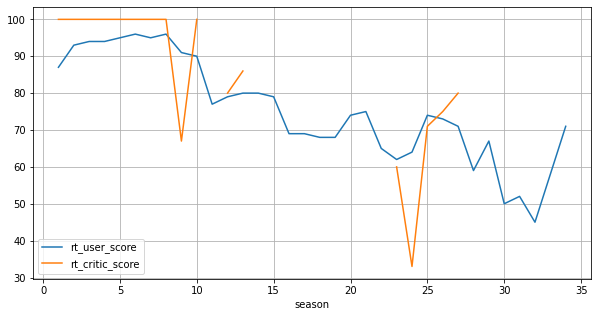

In [ ]:
scores.plot(x='season', y=['rt_user_score', 'rt_critic_score'], figsize=(10,5), grid=True)

##Список вопросов для EDA:

С помощью единственного графика уже можно сделать важный вывод, что интерес(рейтинг) к сериалу с каждым сезоном снижается.

 Далее детально будут рассмотрены следующие вопросы:

1. Какой эпизод самый популярный по численности зрителей/ рейтингу?
2. Какой сезон стал самым популярным по численности зрителей/ рейтингу?
3. Какой эпизод стал самым провальным по численности зрителей/ рейтингу?
4. Какой сезон стал самым провальным по численности зрителей/ рейтингу?
5. Кто был автором (сценаристом) самых популярных эпизодов и есть ли взаимосвязь между автором эпизода и рейтингом?
6. Как менялась популярность сериала?
7. Распределение эпизодов с хорошим и плохим рейтингом в каждом сезоне
8. Про кого чаще снимали серии и каков их рейтинг?

# EDA

In [ ]:
df.head()

,title,description,original_air_date,production_code,directed_by,written_by,season,number_in_season,number_in_series,us_viewers_in_millions,imdb_rating
0,Simpsons Roasting on an Open Fire,Homer is forced to become a department store S...,1989-12-17,7G08,David Silverman,Mimi Pond,1,1,1,26.7,8.1
1,Bart the Genius,Bart ends up at a school for gifted children a...,1990-01-14,7G02,David Silverman,Jon Vitti,1,2,2,24.5,7.7
2,Homer's Odyssey,"After losing his job, Homer contemplates endin...",1990-01-21,7G03,Wes Archer,Jay Kogen & Wallace Wolodarsky,1,3,3,27.5,7.3
3,There's No Disgrace Like Home,After being embarrassed by the rest of the fam...,1990-01-28,7G04,Gregg Vanzo & Kent Butterworth,Al Jean & Mike Reiss,1,4,4,20.2,7.7
4,Bart the General,After being beaten up by Nelson Muntz one too ...,1990-02-04,7G05,David Silverman,John Swartzwelder,1,5,5,27.1,7.9


## Какой эпизод самый популярный по численности зрителей/ рейтингу?

По рейтингу:

In [ ]:
df.sort_values(by = ['imdb_rating'], ascending = False).head(1)

,title,description,original_air_date,production_code,directed_by,written_by,season,number_in_season,number_in_series,us_viewers_in_millions,imdb_rating
175,Homer's Enemy,Homer's laziness begets the ire of his industr...,1997-05-04,4F19,Jim Reardon,John Swartzwelder,8,23,176,11.8,9.3


По количеству зрителей:

In [ ]:
df.sort_values(by = ['us_viewers_in_millions'], ascending = False).head(1)

,title,description,original_air_date,production_code,directed_by,written_by,season,number_in_season,number_in_series,us_viewers_in_millions,imdb_rating
13,Bart Gets an 'F',"Mrs. Krabappel, fed up with Bart's lackadaisic...",1990-10-11,7F03,David Silverman,David M. Stern,2,1,14,33.6,8.2


## Какой сезон стал самым популярным по численности зрителей/ рейтингу?

In [ ]:
season = df.groupby('season')[['us_viewers_in_millions','imdb_rating']].agg(['count','mean'])

In [ ]:
season.columns = ['_'.join(tup).rstrip('_') for tup in season.columns.values]

In [ ]:
def highlight_max(s):
    is_max = s == s.max()
    return ['color: green' if cell else '' for cell in is_max]

season[['us_viewers_in_millions_mean','imdb_rating_mean']].style.apply(highlight_max)

,us_viewers_in_millions_mean,imdb_rating_mean
season,,
1,27.807692,7.700000
2,24.404545,7.990909
3,21.766667,8.154167
4,22.395455,8.268182
5,18.940909,8.327273
6,15.596000,8.332000
7,14.924000,8.352000
8,14.590909,8.212000
9,16.052000,7.800000


## Какой эпизод стал самым провальным по численности зрителей/ рейтингу?

По рейтингу:

In [ ]:
df.sort_values(by = ['imdb_rating'], ascending = True).head(1)

,title,description,original_air_date,production_code,directed_by,written_by,season,number_in_season,number_in_series,us_viewers_in_millions,imdb_rating
507,Lisa Goes Gaga,After a desperate attempt by Lisa to become mo...,2012-05-20,PABF14,Matthew Schofield,Tim Long,23,22,508,4.82,4.0


По количеству зрителей:

In [ ]:
df.sort_values(by = ['us_viewers_in_millions'], ascending = True).head(1)

,title,description,original_air_date,production_code,directed_by,written_by,season,number_in_season,number_in_series,us_viewers_in_millions,imdb_rating
722,Marge the Meanie,Lisa finds an unlikely mentor in Shauna Chalme...,2022-05-08,UABF15,Timothy Bailey,Megan Amram,33,20,726,0.85,6.7


## Какой сезон стал самым провальным по численности зрителей/ рейтингу?

In [ ]:
season = df.groupby('season')[['us_viewers_in_millions','imdb_rating']].agg(['count','mean'])

In [ ]:
season.columns = ['_'.join(tup).rstrip('_') for tup in season.columns.values]

In [ ]:
def highlight_min(s):
    is_min = s == s.min()
    return ['color: red' if cell else '' for cell in is_min]

season[['us_viewers_in_millions_mean','imdb_rating_mean']].style.apply(highlight_min)

,us_viewers_in_millions_mean,imdb_rating_mean
season,,
1,27.807692,7.700000
2,24.404545,7.990909
3,21.766667,8.154167
4,22.395455,8.268182
5,18.940909,8.327273
6,15.596000,8.332000
7,14.924000,8.352000
8,14.590909,8.212000
9,16.052000,7.800000


* Сезон 1 оказался самым популярным по количеству просмотров.
* Сезон 7 является самым рейтинговым.
* Сезон 33 оказался самым провальным по количеству просмотров.
* Сезон 30 является самым провальным по рейтингам.

## Кто был самым успешным автором (сценаристом) сериала?

In [ ]:
written = df.groupby('written_by')[['us_viewers_in_millions','imdb_rating']].agg(['count','mean'])

In [ ]:
written.columns = ['_'.join(tup).rstrip('_') for tup in written.columns.values]

In [ ]:
df.describe()

,season,number_in_season,number_in_series,us_viewers_in_millions,imdb_rating
count,740.000000,740.000000,740.000000,733.000000,736.000000
mean,17.287838,15.822973,3074.866216,10.352333,7.168071
std,9.645804,83.124813,42521.869804,6.907216,0.815296
min,1.000000,1.000000,1.000000,0.850000,4.000000
25%,9.000000,6.000000,185.750000,4.930000,6.600000
50%,17.000000,11.000000,370.500000,8.720000,7.000000
75%,26.000000,17.000000,555.250000,14.800000,7.700000
max,34.000000,1920.000000,712713.000000,33.600000,9.300000


In [ ]:
written_more5 = (written[['us_viewers_in_millions_mean','imdb_rating_count','imdb_rating_mean']]
                 .loc[(written['imdb_rating_mean'] >= df['imdb_rating'].mean()) & (written['imdb_rating_count']>5)]
                 .sort_values(by='imdb_rating_mean',ascending=False))

In [ ]:
written_more5.style.apply(highlight_max)

,us_viewers_in_millions_mean,imdb_rating_count,imdb_rating_mean
written_by,,,
Bill Oakley & Josh Weinstein,17.690909,11,8.263636
Richard Appel,13.783333,6,8.050000
Mike Scully,14.314286,8,8.012500
Jay Kogen & Wallace Wolodarsky,23.825000,8,7.975000
George Meyer,18.885714,7,7.914286
John Swartzwelder,16.452642,53,7.884906
David X. Cohen,12.121429,7,7.871429
Ron Hauge,13.440000,6,7.833333
Jeff Martin,18.480909,11,7.800000


* Самым продуктивным сценаристом по количеству серий явялется John Swartzwelder, также средний рейтинг эпизодов и количество просмотров за авторством John Swartzwelder выше среднего рейтинга эпизодов за все время.

## Как менялась популярность сериала со временем

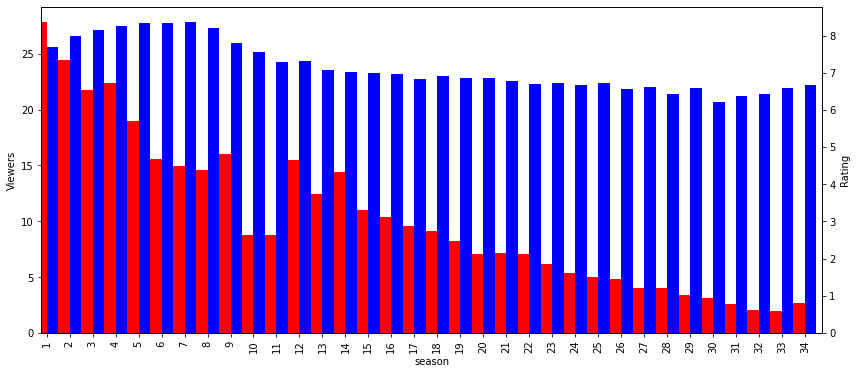

In [ ]:
fig = plt.figure(figsize=(14, 6)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.5

season.us_viewers_in_millions_mean.plot(kind='bar', color='red', ax=ax, width=width, position=1)
season.imdb_rating_mean.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Viewers')
ax2.set_ylabel('Rating')

plt.show()

In [ ]:
season['under 6'] = df[df['imdb_rating'] < 6]['season'].value_counts().sort_index()
season['between 6 and 8'] = df[(df['imdb_rating'] >= 6)&(df['imdb_rating'] < 8)]['season'].value_counts().sort_index()
season['above 8'] = df[df['imdb_rating']>=8]['season'].value_counts().sort_index()
season.fillna(0,inplace=True)

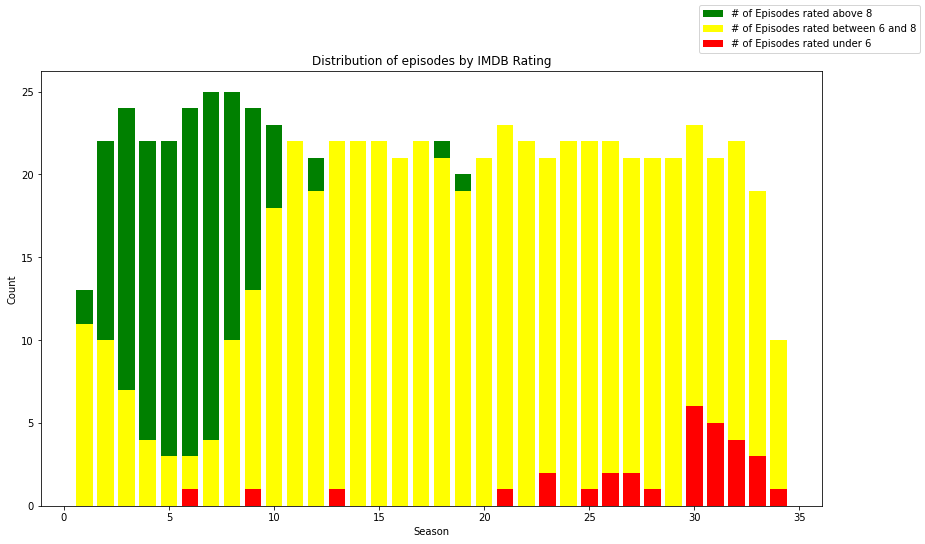

In [ ]:
fig, ax = plt.subplots(figsize = (14, 8))
ax.bar(season.index, season['above 8'], color='green', label = '# of Episodes rated above 8', bottom=season['between 6 and 8'])
ax.bar(season.index, season['between 6 and 8'], color='yellow', label = '# of Episodes rated between 6 and 8', bottom=season['under 6'])
ax.bar(season.index, season['under 6'], color = 'red', label = '# of Episodes rated under 6')
ax.set(title='Distribution of episodes by IMDB Rating', xlabel = 'Season', ylabel = 'Count')
fig.legend()
fig.show()

In [ ]:
def heatmap_(df, column):
    tmp = df[['season','number_in_season', col]].sort_values(by=['season','number_in_season'])
    return tmp.pivot('number_in_season','season',col)

by_viewers = make_df_for_heart_map(df, 'us_viewers_in_millions')
by_ratings = make_df_for_heart_map(df, 'imdb_rating')

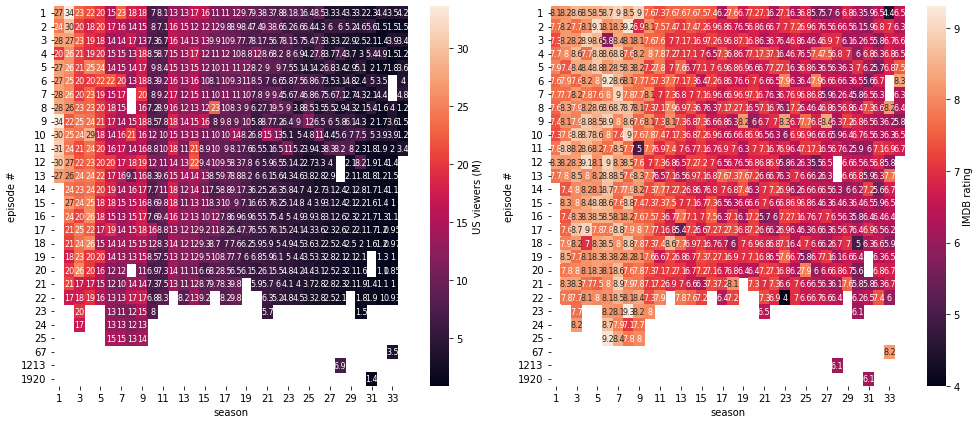

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(14,6), sharex=True)
sns.heatmap(by_viewers, annot=True, ax= ax[0], annot_kws={"size":8}, cbar_kws={'label': 'US viewers (M)'})
ax[0].set_ylabel("episode #", fontsize=10)

sns.heatmap(by_ratings, annot=True, ax= ax[1], annot_kws={"size":8}, cbar_kws={'label': 'IMDB rating'})
ax[1].set_ylabel("episode #", fontsize=10)
plt.tight_layout()
plt.show()

* Количество просмотров с каждым сезоном снижается.
* Средний ретинг также имеется тенденцию на снижение, но не такую явную.
* После 10 сезона количество эпизодов с высоким рейтингом (больше 8) резко снижается. В более поздних сезонах возрастает количество эпизодов с низким рейтингом (ниже 6).
* Видим постепенный спад интереса к сериалу со стороны зрителей и критиков (по количеству просмотров, эпизодов с высоким рейтингом)

## Зависимость упоминания героя от рейтинга и просмотра

In [ ]:
homer = df.loc[df['title'].str.contains("homer", case=False)]
bart = df.loc[df['title'].str.contains("bart", case=False)]
lisa = df.loc[df['title'].str.contains("lisa", case=False)]
marge = df.loc[df['title'].str.contains("marge", case=False)]
moe = df.loc[df['title'].str.contains("moe", case=False)]
burns = df.loc[df['title'].str.contains("burns", case=False)]
apu = df.loc[df['title'].str.contains("apu", case=False)]
krusty = df.loc[df['title'].str.contains("krusty", case=False)]


In [ ]:
characters = ({'Homer': [homer['title'].count(), homer['us_viewers_in_millions'].mean(), homer['imdb_rating'].mean()],
               'Bart':  [bart['title'].count(), bart['us_viewers_in_millions'].mean(), bart['imdb_rating'].mean()],
              'Lisa': [lisa['title'].count(), lisa['us_viewers_in_millions'].mean(), lisa['imdb_rating'].mean()],
              'Marge': [marge['title'].count(), marge['us_viewers_in_millions'].mean(), marge['imdb_rating'].mean()],
              'Moe': [moe['title'].count(), moe['us_viewers_in_millions'].mean(), moe['imdb_rating'].mean()],
              'Burns': [burns['title'].count(), burns['us_viewers_in_millions'].mean(), burns['imdb_rating'].mean()],
              'Apu': [apu['title'].count(), apu['us_viewers_in_millions'].mean(), apu['imdb_rating'].mean()],
              'Krusty': [krusty['title'].count(), krusty['us_viewers_in_millions'].mean(), krusty['imdb_rating'].mean()]})
characters

{'Homer': [57, 14.87175438596491, 7.6912280701754385],
 'Bart': [49, 13.397142857142859, 7.489795918367347],
 'Lisa': [45, 12.182272727272727, 7.326666666666669],
 'Marge': [23, 12.705217391304348, 7.373913043478261],
 'Moe': [9, 10.466666666666667, 7.133333333333334],
 'Burns': [13, 11.599999999999998, 7.5076923076923086],
 'Apu': [4, 12.212500000000002, 7.3999999999999995],
 'Krusty': [4, 18.4275, 7.824999999999999]}

In [ ]:
characters_frame = pd.DataFrame.from_dict(characters,orient='index',
                       columns=['Count', 'us_viewers_in_millions_mean', 'imdb_rating_mean'])
characters_frame

,Count,us_viewers_in_millions_mean,imdb_rating_mean
Homer,57,14.871754,7.691228
Bart,49,13.397143,7.489796
Lisa,45,12.182273,7.326667
Marge,23,12.705217,7.373913
Moe,9,10.466667,7.133333
Burns,13,11.600000,7.507692
Apu,4,12.212500,7.400000
Krusty,4,18.427500,7.825000


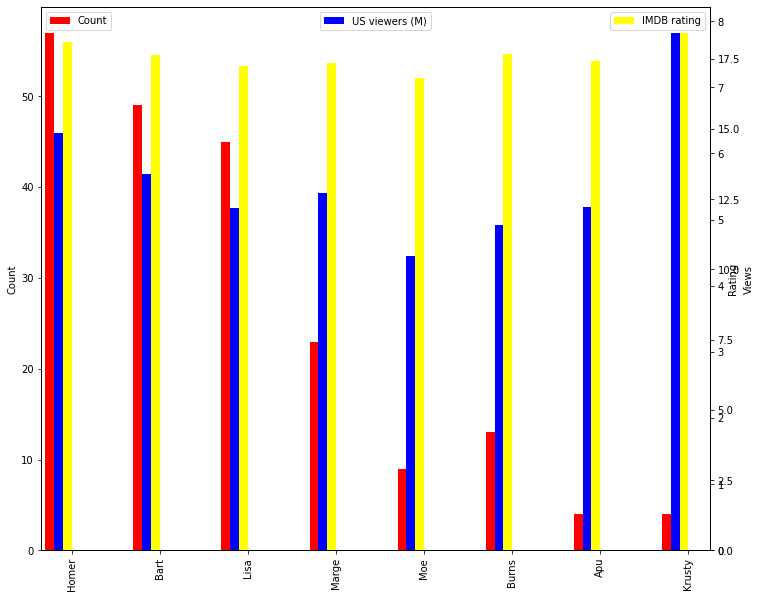

In [ ]:
fig = plt.figure(figsize=(12, 10)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
ax3 = ax.twinx()

width1 = 0.1

characters_frame.Count.plot(kind='bar', color='red', ax=ax, width=width1, position=3, label="Count")
characters_frame.us_viewers_in_millions_mean.plot(kind='bar', color='blue', ax=ax2, width=width1, position=2)
characters_frame.imdb_rating_mean.plot(kind='bar', color='yellow',   width=width1, position=1)

ax.set_ylabel('Count')
ax.legend(['Count'], loc='upper left')
ax2.set_ylabel('Views')
ax2.legend(['US viewers (М)'], loc='upper center')
ax3.set_ylabel('Rating')
ax3.legend(['IMDB rating'], loc='best')


plt.show()

* Чаще всего главным героем эпизода, если судить о названии, является Homer. Количество эпизодов, в названии которых упоминается этот персонаж, выходило чаще остальных (57). Вторым по пулярности является Bart (49).
* Персонажам Apu и Krusty досталось меньше всего экранного времени (по 4 эпизода), но рейтинги эпизодов и количество зрителей у клоуна Krusty оказалось даже выше, чем у основных персонажей сериала, но это обусловлено скорее небольшим количеством эпизодов с ним.